# Analysis of raw dataset

In [262]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [263]:
df = pd.read_csv('raw_data.csv').drop(columns=['Unnamed: 0'])
df.keys()

Index(['EAN', 'amount', 'brand', 'capacity', 'category', 'description',
       'extras', 'image_url', 'ingredients', 'origin', 'price', 'seller',
       'storage', 'title', 'url', 'weight'],
      dtype='object')

In [264]:
df.dtypes

EAN            object
amount         object
brand          object
capacity       object
category       object
description    object
extras         object
image_url      object
ingredients    object
origin         object
price          object
seller         object
storage        object
title          object
url            object
weight         object
dtype: object

In [265]:
df = df.sample(frac=1) # shuffle data
df.head()

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
5787,5907637328574,499 g,ECO+,NaN,DROGERIA > ŚRODKI DO CZYSZCZENIA > PROSZKI DO ...,NaN,NaN,https://leclercdrive.lublin.pl/154187-large_de...,Skład: <5% anionowe środki powierzchniowo czyn...,NaN,"1,69 zł",Leclerc lublin,Przechowywać w szczelnie zamkniętych oryginaln...,Proszek do czyszczenia,https://leclercdrive.lublin.pl/proszki-do-czys...,NaN
5411,5449000087775,3.00 L,Fanta,NaN,WODA I NAPOJE > NAPOJE GAZOWANE,NaN,konserwanty: Nie zawiera,https://leclercdrive.lublin.pl/113458-large_de...,woda\r\ncukier\r\nsok pomarańczowy (5%) z soku...,NaN,"9,59 zł",Leclerc lublin,Zawartość soku może powodować powstawanie natu...,"Fanta Pomarańczowa Napój gazowany 2 x 1,5 l",https://leclercdrive.lublin.pl/napoje-gazowane...,NaN
7890,5060466512665,250 ml,NaN,250 ml,Napoje > Napoje energetyczne,Burn Apple Kiwi Gazowany napój energetyczny 25...,NaN,https://www.leclerc.rzeszow.pl/resize.php?pic=...,woda\ncukier\ndwutlenek węgla\nkwas: kwas cytr...,UE,2.89,Leclerc Rzeszów,NaN,Burn Apple Kiwi Gazowany napój energetyczny 25...,https://www.leclerc.rzeszow.pl/burn-apple-kiwi...,Waga netto 250 ml
2017,5900541007900,9 l,ŻYWIEC ZDRÓJ,9 l,Napoje > Niegazowane > Owocowe > Z owoców cytr...,ŻYWIEC ZDRÓJ Z NUTĄ Mięty i Limonki\n\nPołącze...,NaN,"https://www.frisco.pl/pid,112620/stn,product","woda źródlana 97 %, cukier, regulator kwasowoś...",NaN,26.94,Frisco,Przechowywać w temperaturze otoczenia.,ŻYWIEC ZDRÓJ Z NUTĄ Mięty i Limonki,"https://www.frisco.pl/pid,112620/stn,product",NaN
7645,5901886010198,2 l,Garden,2 l,Napoje > Napoje niegazowane,"Garden Napój jabłko 2 l FSC - www.fsc.org, Mie...",konserwanty - Nie zawiera\nSubstancje słodzące...,https://www.leclerc.rzeszow.pl/resize.php?pic=...,naturalna woda mineralna\nsok jabłkowy z zagęs...,NaN,3.69,Leclerc Rzeszów,Po otwarciu przechowywać w lodówce nie dłużej ...,Garden Napój jabłko 2 l,https://www.leclerc.rzeszow.pl/garden-napoj-ja...,Waga netto 2 l


## Data cleaning
Drop corupted data from swiadome zakupy

In [266]:
df = df[df['seller'] != '']

Choose records with EAN and title available

In [267]:
df = df.dropna(subset=['EAN', 'title'], how='any')

Drop unknown sellers

In [268]:
df['seller'].unique()
df = df[df['seller'] != '7.19']

Extract the main category from category tree.

In [269]:
categories = df['category'].str.split('>', n=1, expand=True)
categories.head()

,0,1
5787,DROGERIA,ŚRODKI DO CZYSZCZENIA > PROSZKI DO CZYSZCZENIA
5411,WODA I NAPOJE,NAPOJE GAZOWANE
7890,Napoje,Napoje energetyczne
2017,Napoje,Niegazowane > Owocowe > Z owoców cytrusowych ...
7645,Napoje,Napoje niegazowane


In [270]:
df['main_category'] = categories[0]
df['main_category'] = df['main_category'].str.lower()
df['main_category'] = df['main_category'].str.strip()
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3353,3319,3165,3295,3353,3353,1222,3353,2037,255,3045,3353,2062,3353,3353,1670
"środki czystości, chemia",2430,2430,2430,1241,2430,2430,2,2430,1522,735,2430,2430,1096,2430,2430,1867
drogeria,791,790,774,0,791,556,1,791,630,320,791,791,418,791,791,0
chemia,688,542,408,542,688,684,1,688,477,310,688,688,352,688,688,542
woda i napoje,586,583,574,0,586,339,209,586,467,150,584,586,575,586,586,0
alkohol,323,254,154,319,323,277,222,316,37,43,168,315,30,323,316,115
bio,86,86,86,64,86,86,0,86,30,12,86,86,29,86,86,26
soki świeże i tłoczone,40,37,34,37,40,40,6,40,10,0,40,40,34,40,40,37
mama i dziecko,24,24,24,6,24,24,4,24,18,4,24,24,10,24,24,18


Unify category names

In [271]:
def map_prime_category(data, old_value, new_value):
    data.at[df['main_category'] == old_value, 'main_category'] = new_value
    return data

df = map_prime_category(df, 'woda i napoje', 'napoje')
df = map_prime_category(df, 'soki świeże i tłoczone', 'napoje')
df = map_prime_category(df, 'środki czystości, chemia', 'chemia')
df = map_prime_category(df, 'drogeria', 'chemia')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3979,3939,3773,3332,3979,3732,1437,3979,2514,405,3669,3979,2671,3979,3979,1707
chemia,3909,3762,3612,1783,3909,3670,4,3909,2629,1365,3909,3909,1866,3909,3909,2409
alkohol,323,254,154,319,323,277,222,316,37,43,168,315,30,323,316,115
bio,86,86,86,64,86,86,0,86,30,12,86,86,29,86,86,26
mama i dziecko,24,24,24,6,24,24,4,24,18,4,24,24,10,24,24,18
strefa roślinna,20,20,20,20,20,20,0,20,8,0,20,20,20,20,20,0
zdrowa żywność,8,8,8,0,8,6,0,8,6,0,8,8,8,8,8,0
spożywcze,6,6,6,4,6,6,0,6,4,2,6,6,2,6,6,4
artykuły spożywcze,3,0,2,0,3,3,0,3,0,0,3,3,3,3,3,0


Select only "napoje" and "chemia"

In [272]:
df = df.loc[df['main_category'].isin(['napoje', 'chemia'])]
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3979,3939,3773,3332,3979,3732,1437,3979,2514,405,3669,3979,2671,3979,3979,1707
chemia,3909,3762,3612,1783,3909,3670,4,3909,2629,1365,3909,3909,1866,3909,3909,2409


Combination of EAN and seller must be unique.

We want offers to be unique in every seller.

In [273]:
df['EAN_seller'] = df['EAN'] + '_' + df['seller']
print('Unique')
df.groupby(by='main_category')['EAN_seller'].nunique()

Unique


main_category
chemia    2699
napoje    2782
Name: EAN_seller, dtype: int64

In [274]:
df = df.drop_duplicates(subset=['EAN_seller'])
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight,EAN_seller
main_category,,,,,,,,,,,,,,,,,
napoje,2782,2742,2576,2145,2782,2535,1114,2782,1759,316,2474,2782,1838,2782,2782,1182,2782
chemia,2699,2552,2402,1164,2699,2460,3,2699,1870,1006,2699,2699,1323,2699,2699,1483,2699


In [275]:
print('Unique')
df.groupby(by='main_category').nunique()

Unique


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight,EAN_seller
main_category,,,,,,,,,,,,,,,,,
chemia,1797,365,174,192,1218,1719,3,2699,855,42,451,3,222,2304,2699,601,2699
napoje,2078,195,238,153,709,1667,94,2782,892,25,454,4,326,1818,2782,302,2782


In [276]:
df = df.drop('EAN_seller', axis=1)

Select products which are present in more than one shop

In [277]:
ean_counts = df['EAN'].value_counts()
ean_counts.value_counts()

1    2639
2     866
3     370
Name: EAN, dtype: int64

In [278]:
df = df[df['EAN'].isin(ean_counts[ean_counts > 1].index)]
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
chemia,1585,1470,1392,719,1585,1446,3,1585,1280,697,1585,1585,840,1585,1585,796
napoje,1257,1229,1122,839,1257,1096,475,1257,947,151,1255,1257,941,1257,1257,672


In [279]:
print('Unique')
df.groupby(by='main_category').nunique()

Unique


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
chemia,683,240,125,130,546,893,3,1585,495,31,316,3,127,1239,1585,351
napoje,553,90,128,64,339,874,58,1257,447,15,242,3,183,863,1257,202


In [280]:
df.groupby(by='seller').count()

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,storage,title,url,weight,main_category
seller,,,,,,,,,,,,,,,,
Frisco,888,888,888,697,888,888,135,888,690,254,888,533,888,888,607,888
Leclerc Rzeszów,1003,861,691,861,1003,1003,201,1003,757,269,1003,549,1003,1003,861,1003
Leclerc lublin,951,950,935,0,951,651,142,951,780,325,949,699,951,951,0,951


Text(0.5, 1.0, 'Chemia')

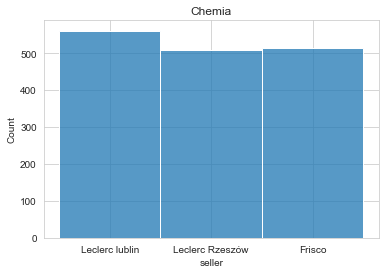

In [281]:
sns.histplot(df[df['main_category'] == 'chemia'], x='seller').set_title('Chemia')

Text(0.5, 1.0, 'Napoje')

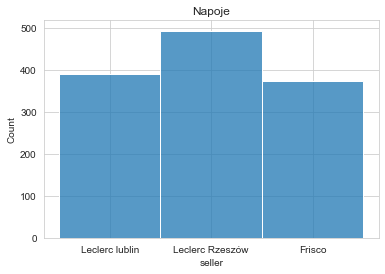

In [282]:
sns.histplot(df[df['main_category'] == 'napoje'], x='seller').set_title('Napoje')

## Normalization to WDC v2 format

In [283]:
df.fillna('', inplace=True)

In [284]:
df_normalized = pd.DataFrame()
for k in df.keys():
    df_normalized[k] = df[k].str.lower()
    df_normalized[k] = df_normalized[k].str.replace(r'\W',r' ',regex=True)
    df_normalized[k] = df_normalized[k].str.replace(r' +',r' ',regex=True)
df_normalized.head()

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight,main_category
5787,5907637328574,499 g,eco,,drogeria środki do czyszczenia proszki do czys...,,,https leclercdrive lublin pl 154187 large_defa...,skład 5 anionowe środki powierzchniowo czynne ...,,1 69 zł,leclerc lublin,przechowywać w szczelnie zamkniętych oryginaln...,proszek do czyszczenia,https leclercdrive lublin pl proszki do czyszc...,,chemia
5411,5449000087775,3 00 l,fanta,,woda i napoje napoje gazowane,,konserwanty nie zawiera,https leclercdrive lublin pl 113458 large_defa...,woda cukier sok pomarańczowy 5 z soku zagęszcz...,,9 59 zł,leclerc lublin,zawartość soku może powodować powstawanie natu...,fanta pomarańczowa napój gazowany 2 x 1 5 l,https leclercdrive lublin pl napoje gazowane 1...,,napoje
7890,5060466512665,250 ml,,250 ml,napoje napoje energetyczne,burn apple kiwi gazowany napój energetyczny 25...,,https www leclerc rzeszow pl resize php pic 16...,woda cukier dwutlenek węgla kwas kwas cytrynow...,ue,2 89,leclerc rzeszów,,burn apple kiwi gazowany napój energetyczny 25...,https www leclerc rzeszow pl burn apple kiwi g...,waga netto 250 ml,napoje
7645,5901886010198,2 l,garden,2 l,napoje napoje niegazowane,garden napój jabłko 2 l fsc www fsc org miesza...,konserwanty nie zawiera substancje słodzące za...,https www leclerc rzeszow pl resize php pic 14...,naturalna woda mineralna sok jabłkowy z zagęsz...,,3 69,leclerc rzeszów,po otwarciu przechowywać w lodówce nie dłużej ...,garden napój jabłko 2 l,https www leclerc rzeszow pl garden napoj jabl...,waga netto 2 l,napoje
5361,5900497036726,1 50 l,pepsi,,woda i napoje napoje gazowane,,substancje słodzące zawiera,https leclercdrive lublin pl 149508 large_defa...,woda dwutlenek węgla barwnik e150d kwasy kwas ...,,3 99 zł,leclerc lublin,przechowywać w chłodnym i suchym miejscu chron...,pepsi lime napój gazowany 1 5 l,https leclercdrive lublin pl napoje gazowane 1...,,napoje


In [285]:
def to_WDC_standard(data):
    wdc_df = pd.DataFrame({'id':data.index}).set_index('id')
    wdc_df['cluster_id'] = data['EAN']
    wdc_df['identifiers'] = [[{'EAN': [e]}] for e in data['EAN'].to_list()]
    wdc_df['category'] = data['main_category']
    wdc_df['title'] = data['title']
    wdc_df['description'] = data['description']
    wdc_df['brand'] = data['brand']
    wdc_df['price'] = data['price']
    spec_table = 'amount ' + data['amount']
    for c in ['capacity', 'extras', 'image_url', 'ingredients', 'origin', 'storage', 'url', 'weight']:
        s =  ' ' + c + ' ' + data[c]
        spec_table += s
    wdc_df['specTableContent'] = spec_table
    wdc_df['keyValuePairs'] = data.loc[:, ['amount', 'capacity', 'extras', 'image_url', 'ingredients', 'origin', 'storage', 'url', 'weight']].to_dict(orient='records')
    return wdc_df

In [286]:
wdc_df_non_normalized = to_WDC_standard(df)
wdc_df_non_normalized.head()

,cluster_id,identifiers,category,title,description,brand,price,specTableContent,keyValuePairs
id,,,,,,,,,
5787,5907637328574,[{'EAN': ['5907637328574']}],chemia,Proszek do czyszczenia,,ECO+,"1,69 zł",amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ..."
5411,5449000087775,[{'EAN': ['5449000087775']}],napoje,"Fanta Pomarańczowa Napój gazowany 2 x 1,5 l",,Fanta,"9,59 zł",amount 3.00 L capacity extras konserwanty: Ni...,"{'amount': '3.00 L', 'capacity': '', 'extras':..."
7890,5060466512665,[{'EAN': ['5060466512665']}],napoje,Burn Apple Kiwi Gazowany napój energetyczny 25...,Burn Apple Kiwi Gazowany napój energetyczny 25...,,2.89,amount 250 ml capacity 250 ml extras image_ur...,"{'amount': '250 ml', 'capacity': '250 ml', 'ex..."
7645,5901886010198,[{'EAN': ['5901886010198']}],napoje,Garden Napój jabłko 2 l,"Garden Napój jabłko 2 l FSC - www.fsc.org, Mie...",Garden,3.69,amount 2 l capacity 2 l extras konserwanty - N...,"{'amount': '2 l', 'capacity': '2 l', 'extras':..."
5361,5900497036726,[{'EAN': ['5900497036726']}],napoje,"Pepsi Lime Napój gazowany 1,5 l",,Pepsi,"3,99 zł",amount 1.50 L capacity extras Substancje słod...,"{'amount': '1.50 L', 'capacity': '', 'extras':..."


In [287]:
wdc_df_non_normalized.to_json('pl_wdc_non_normalized.json.gz', orient='records', compression='gzip', index=True)

In [288]:
wdc_df_normalized = to_WDC_standard(df_normalized)
wdc_df_normalized.head()

,cluster_id,identifiers,category,title,description,brand,price,specTableContent,keyValuePairs
id,,,,,,,,,
5787,5907637328574,[{'EAN': ['5907637328574']}],chemia,proszek do czyszczenia,,eco,1 69 zł,amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ..."
5411,5449000087775,[{'EAN': ['5449000087775']}],napoje,fanta pomarańczowa napój gazowany 2 x 1 5 l,,fanta,9 59 zł,amount 3 00 l capacity extras konserwanty nie...,"{'amount': '3 00 l', 'capacity': '', 'extras':..."
7890,5060466512665,[{'EAN': ['5060466512665']}],napoje,burn apple kiwi gazowany napój energetyczny 25...,burn apple kiwi gazowany napój energetyczny 25...,,2 89,amount 250 ml capacity 250 ml extras image_ur...,"{'amount': '250 ml', 'capacity': '250 ml', 'ex..."
7645,5901886010198,[{'EAN': ['5901886010198']}],napoje,garden napój jabłko 2 l,garden napój jabłko 2 l fsc www fsc org miesza...,garden,3 69,amount 2 l capacity 2 l extras konserwanty nie...,"{'amount': '2 l', 'capacity': '2 l', 'extras':..."
5361,5900497036726,[{'EAN': ['5900497036726']}],napoje,pepsi lime napój gazowany 1 5 l,,pepsi,3 99 zł,amount 1 50 l capacity extras substancje słod...,"{'amount': '1 50 l', 'capacity': '', 'extras':..."


In [289]:
wdc_df_normalized.to_json('pl_wdc_normalized.json.gz', orient='records', compression='gzip', index=True)

In [290]:
wdc_df_normalized.reset_index(level=0, inplace=True)
positive_pairs_normalized = wdc_df_normalized.merge(wdc_df_normalized, on='cluster_id',
                                                    suffixes=['_left', '_right'])
positive_pairs_normalized['cluster_id_left'] = positive_pairs_normalized['cluster_id']
positive_pairs_normalized['cluster_id_right'] = positive_pairs_normalized['cluster_id']
positive_pairs_normalized['label'] = 1
positive_pairs_normalized = positive_pairs_normalized.drop('cluster_id', axis=1)
positive_pairs_normalized.head()

,id_left,identifiers_left,category_left,title_left,description_left,brand_left,price_left,specTableContent_left,keyValuePairs_left,id_right,...,category_right,title_right,description_right,brand_right,price_right,specTableContent_right,keyValuePairs_right,cluster_id_left,cluster_id_right,label
0,5787,[{'EAN': ['5907637328574']}],chemia,proszek do czyszczenia,,eco,1 69 zł,amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ...",5787,...,chemia,proszek do czyszczenia,,eco,1 69 zł,amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ...",5907637328574,5907637328574,1
1,5787,[{'EAN': ['5907637328574']}],chemia,proszek do czyszczenia,,eco,1 69 zł,amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ...",6891,...,chemia,proszek do czyszczenia 500g,proszek do czyszczenia,eco,1 89,amount capacity extras image_url https www ...,"{'amount': '', 'capacity': '', 'extras': '', '...",5907637328574,5907637328574,1
2,6891,[{'EAN': ['5907637328574']}],chemia,proszek do czyszczenia 500g,proszek do czyszczenia,eco,1 89,amount capacity extras image_url https www ...,"{'amount': '', 'capacity': '', 'extras': '', '...",5787,...,chemia,proszek do czyszczenia,,eco,1 69 zł,amount 499 g capacity extras image_url https...,"{'amount': '499 g', 'capacity': '', 'extras': ...",5907637328574,5907637328574,1
3,6891,[{'EAN': ['5907637328574']}],chemia,proszek do czyszczenia 500g,proszek do czyszczenia,eco,1 89,amount capacity extras image_url https www ...,"{'amount': '', 'capacity': '', 'extras': '', '...",6891,...,chemia,proszek do czyszczenia 500g,proszek do czyszczenia,eco,1 89,amount capacity extras image_url https www ...,"{'amount': '', 'capacity': '', 'extras': '', '...",5907637328574,5907637328574,1
4,5411,[{'EAN': ['5449000087775']}],napoje,fanta pomarańczowa napój gazowany 2 x 1 5 l,,fanta,9 59 zł,amount 3 00 l capacity extras konserwanty nie...,"{'amount': '3 00 l', 'capacity': '', 'extras':...",5411,...,napoje,fanta pomarańczowa napój gazowany 2 x 1 5 l,,fanta,9 59 zł,amount 3 00 l capacity extras konserwanty nie...,"{'amount': '3 00 l', 'capacity': '', 'extras':...",5449000087775,5449000087775,1


In [294]:
positive_pairs_normalized.groupby(by=['category_left', 'category_right']).count()

,,id_left,identifiers_left,title_left,description_left,brand_left,price_left,specTableContent_left,keyValuePairs_left,id_right,identifiers_right,title_right,description_right,brand_right,price_right,specTableContent_right,keyValuePairs_right,cluster_id_left,cluster_id_right,label
category_left,category_right,,,,,,,,,,,,,,,,,,,
chemia,chemia,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827,3827
napoje,napoje,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967
